In this is a very basic example of overfitting used for image reconstruction, to give the reader an intuation for radiance field volumetric reconstruction. We overfit a network to predict the colors of pixels of an image. Than we use the overfitted network to reconstruct the image.
Radiance field networks use a similar approach except that they use multiple images from different cameras, and instead of taking in the pixels coordinates they take a half-ray starting point and direction.(see for example https://github.com/sxyu/svox2)

In [2]:
import himage as hi
import tensorflow as tf


2024-02-02 07:00:39.415784: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 07:00:39.562121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 07:00:39.562178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 07:00:39.588057: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 07:00:39.648893: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 07:00:39.650014: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
import numpy as np
im = hi.imread('lena.png')
ij = np.array([[x,y] for x in range(0,im.shape[0]) for y in range(0,im.shape[1])])
rgb = np.array([im[x,y] for x in range(0,im.shape[0]) for y in range(0,im.shape[1])])

In [15]:
print(ij.shape)
print(rgb.shape)

(262144, 2)
(262144, 3)


In [44]:
# create a model to predict the color of a pixel
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# compile the model
model.compile(optimizer='nadam',
              loss='mean_squared_error')

# train the model on the data
model.fit(ij, rgb, epochs=10)

Epoch 1/10
8192/8192 [==============================] - 11s 1ms/step - loss: 0.1680
Epoch 2/10
8192/8192 [==============================] - 13s 2ms/step - loss: 0.0648
Epoch 3/10
8192/8192 [==============================] - 11s 1ms/step - loss: 0.0294
Epoch 4/10
8192/8192 [==============================] - 11s 1ms/step - loss: 0.0279
Epoch 5/10
8192/8192 [==============================] - 14s 2ms/step - loss: 0.0266
Epoch 6/10
8192/8192 [==============================] - 11s 1ms/step - loss: 0.0253
Epoch 7/10
8192/8192 [==============================] - 12s 1ms/step - loss: 0.0245
Epoch 8/10
8192/8192 [==============================] - 12s 1ms/step - loss: 0.0240
Epoch 9/10
8192/8192 [==============================] - 11s 1ms/step - loss: 0.0237
Epoch 10/10
8192/8192 [==============================] - 14s 2ms/step - loss: 0.0234


In [45]:
predictions = model.predict(ij)

reconsturcted_image = predictions.reshape(im.shape)


8192/8192 [==============================] - 7s 904us/step


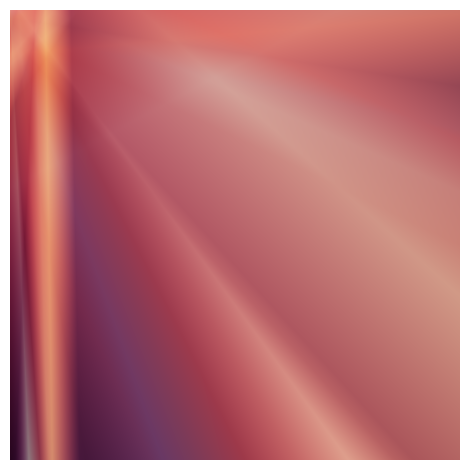

In [46]:
hi.imshow(reconsturcted_image)


In [36]:
# create a model to predict the color of a pixel
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# compile the model
model.compile(optimizer='nadam',
              loss='mean_squared_error')

# train the model on the data
model.fit(ij, rgb, epochs=10)

Epoch 1/10
8192/8192 [==============================] - 18s 2ms/step - loss: 0.0323
Epoch 2/10
8192/8192 [==============================] - 15s 2ms/step - loss: 0.0214
Epoch 3/10
8192/8192 [==============================] - 16s 2ms/step - loss: 0.0196
Epoch 4/10
8192/8192 [==============================] - 15s 2ms/step - loss: 0.0185
Epoch 5/10
8192/8192 [==============================] - 15s 2ms/step - loss: 0.0172
Epoch 6/10
8192/8192 [==============================] - 16s 2ms/step - loss: 0.0159
Epoch 7/10
8192/8192 [==============================] - 15s 2ms/step - loss: 0.0150
Epoch 8/10
8192/8192 [==============================] - 15s 2ms/step - loss: 0.0144
Epoch 9/10
8192/8192 [==============================] - 15s 2ms/step - loss: 0.0139
Epoch 10/10
8192/8192 [==============================] - 15s 2ms/step - loss: 0.0136


In [37]:
predictions = model.predict(ij)

reconsturcted_image = predictions.reshape(im.shape)

8192/8192 [==============================] - 10s 1ms/step


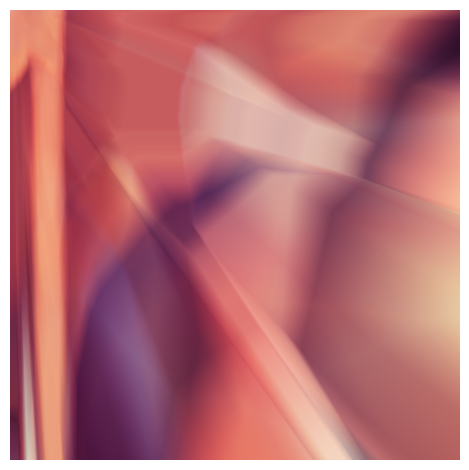

0.96855414 0.06338122


In [38]:
hi.imshow(reconsturcted_image)
print(reconsturcted_image.max(), reconsturcted_image.min())

In [41]:

# create a model to predict the color of a pixel
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# compile the model
model.compile(optimizer='nadam',
              loss='mean_squared_error')

# train the model on the data
model.fit(ij, rgb, epochs=10)


Epoch 1/10
8192/8192 [==============================] - 25s 3ms/step - loss: 0.0217
Epoch 2/10
8192/8192 [==============================] - 22s 3ms/step - loss: 0.0138
Epoch 3/10
8192/8192 [==============================] - 23s 3ms/step - loss: 0.0113
Epoch 4/10
8192/8192 [==============================] - 22s 3ms/step - loss: 0.0103
Epoch 5/10
8192/8192 [==============================] - 23s 3ms/step - loss: 0.0096
Epoch 6/10
8192/8192 [==============================] - 22s 3ms/step - loss: 0.0092
Epoch 7/10
8192/8192 [==============================] - 23s 3ms/step - loss: 0.0088
Epoch 8/10
8192/8192 [==============================] - 22s 3ms/step - loss: 0.0086
Epoch 9/10
8192/8192 [==============================] - 24s 3ms/step - loss: 0.0083
Epoch 10/10
8192/8192 [==============================] - 23s 3ms/step - loss: 0.0081


In [42]:
predictions = model.predict(ij)

reconsturcted_image = predictions.reshape(im.shape)


8192/8192 [==============================] - 12s 1ms/step


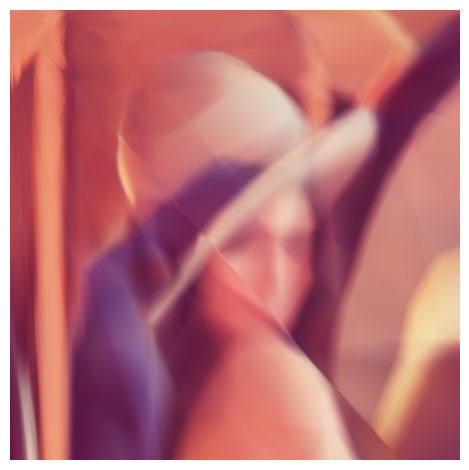

In [43]:
hi.imshow(reconsturcted_image)

In [78]:

# create a model to predict the color of a pixel
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# compile the model
model.compile(optimizer='nadam',
              loss='mean_squared_error')

# train the model on the data
model.fit(ij, rgb, epochs=30)


Epoch 1/30
8192/8192 [==============================] - 39s 4ms/step - loss: 0.0209
Epoch 2/30
8192/8192 [==============================] - 34s 4ms/step - loss: 0.0142
Epoch 3/30
8192/8192 [==============================] - 33s 4ms/step - loss: 0.0123
Epoch 4/30
8192/8192 [==============================] - 34s 4ms/step - loss: 0.0113
Epoch 5/30
8192/8192 [==============================] - 32s 4ms/step - loss: 0.0107
Epoch 6/30
8192/8192 [==============================] - 32s 4ms/step - loss: 0.0100
Epoch 7/30
8192/8192 [==============================] - 32s 4ms/step - loss: 0.0103
Epoch 8/30
8192/8192 [==============================] - 33s 4ms/step - loss: 0.0099
Epoch 9/30
8192/8192 [==============================] - 32s 4ms/step - loss: 0.0102
Epoch 10/30
8192/8192 [==============================] - 33s 4ms/step - loss: 0.0094
Epoch 11/30
8192/8192 [==============================] - 33s 4ms/step - loss: 0.0092
Epoch 12/30
8192/8192 [==============================] - 33s 4ms/step - lo

In [79]:
predictions = model.predict(ij)

reconsturcted_image = predictions.reshape(im.shape)


1864/8192 [=====>........................] - ETA: 10s

8192/8192 [==============================] - 15s 2ms/step


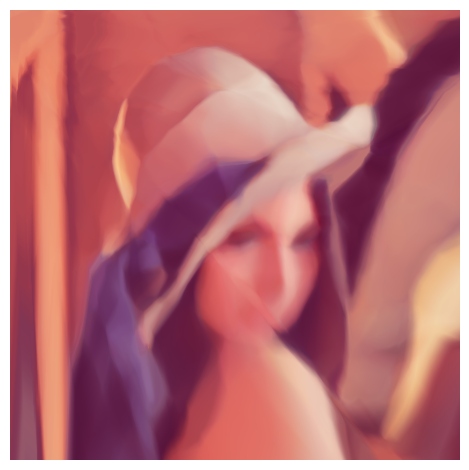

In [80]:
hi.imshow(reconsturcted_image)
